### **MOVIE RECOMMENDATION SYSTEM**

In [1]:
import numpy as np
import pandas as pd

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load MovieLens 100K ratings data
col_names = ['userId', 'movieId', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=col_names)

In [3]:
# Convert to binary classification: liked (1) if rating >= 4, else not liked (0)
ratings['liked'] = (ratings['rating'] >= 4).astype(int)

In [4]:

# Encode categorical features
user_enc = LabelEncoder()
movie_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['userId'])
ratings['movie'] = movie_enc.fit_transform(ratings['movieId'])

In [5]:
# Features and target
X = ratings[['user', 'movie']]
y = ratings['liked']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy:  {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall:    {recall:.3f}')
print(f'F1 Score:  {f1:.3f}')



Accuracy:  0.596
Precision: 0.596
Recall:    0.823
F1 Score:  0.691


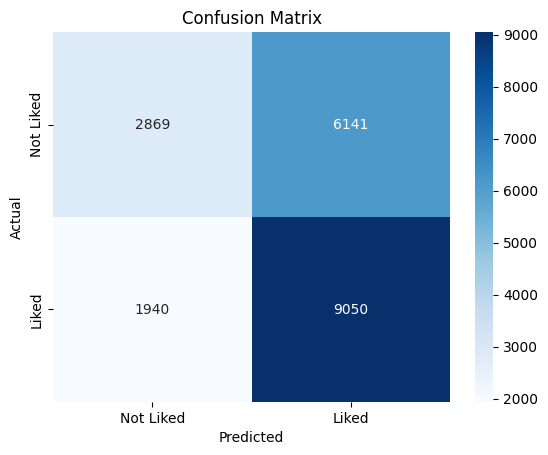

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
